Sweetviz, which is another alternative to pandas-profiling (now ydata-profiling) for automated EDA (Exploratory Data Analysis).

In [2]:
%pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import sweetviz as sv

In [4]:
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Age": [25, 30, 35, 40, 29],
    "Salary": [50000, 60000, 75000, 100000, 65000],
    "Department": ["HR", "Finance", "IT", "IT", "Finance"]
})


In [5]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


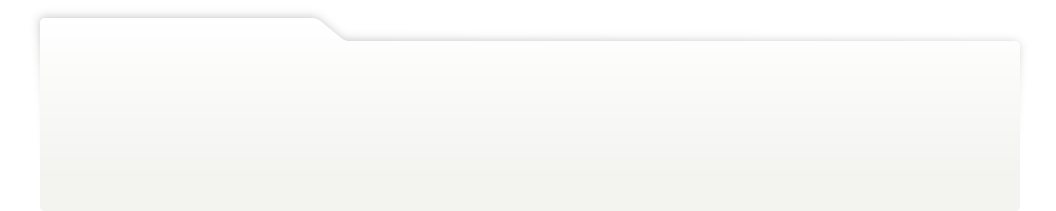
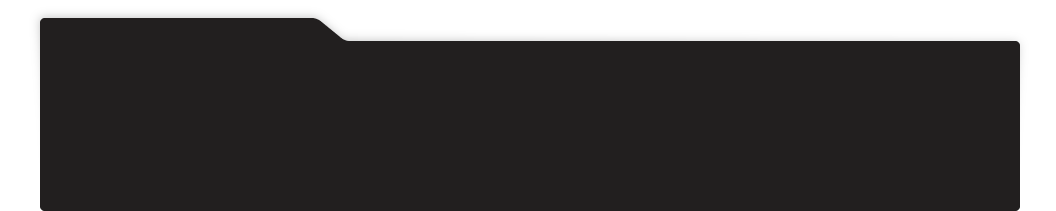
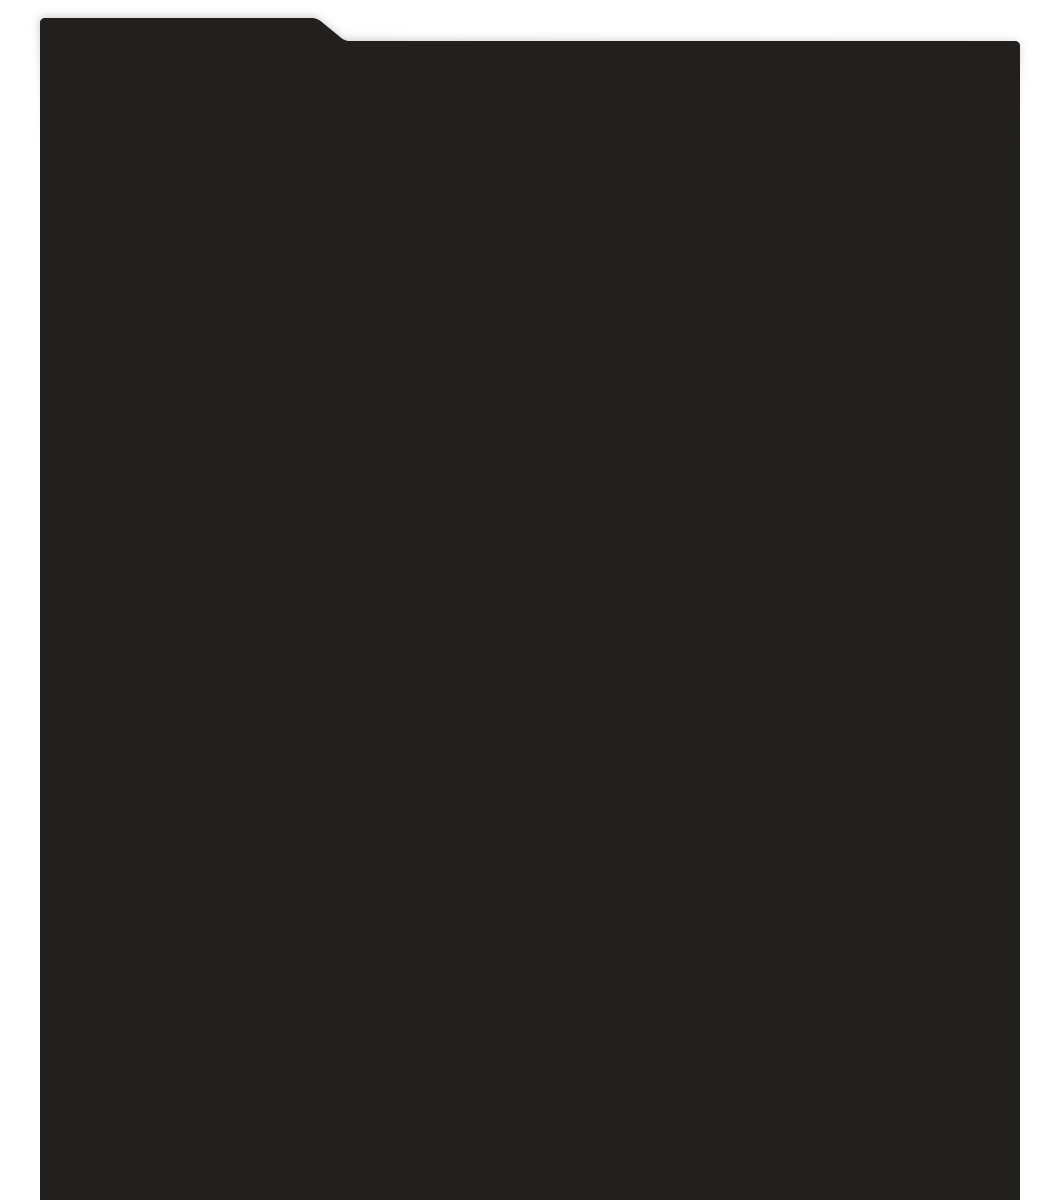
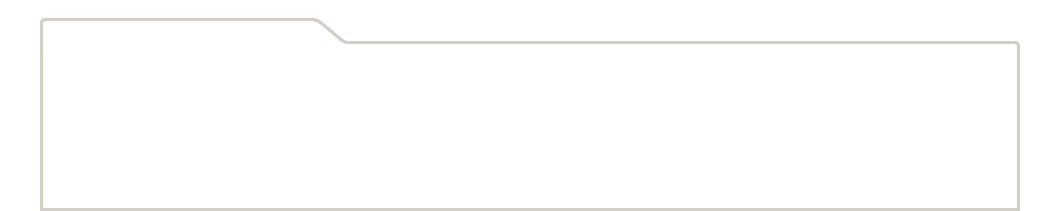
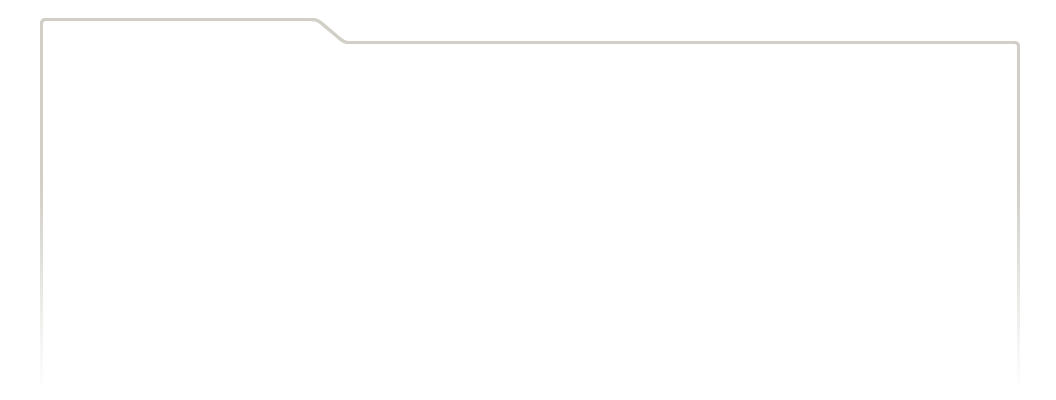
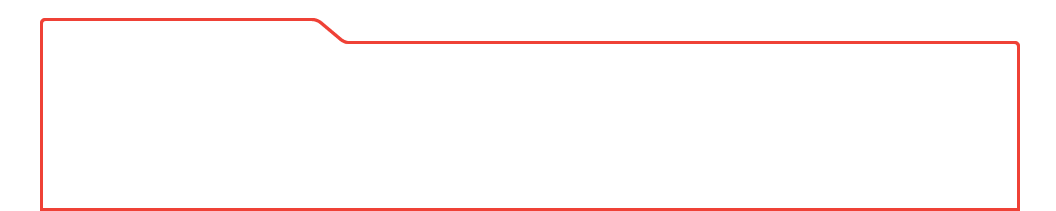
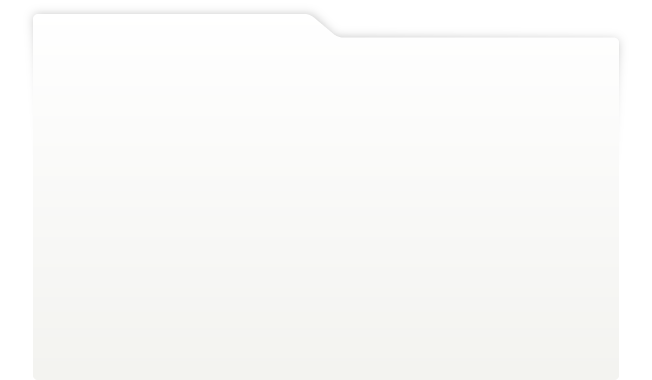
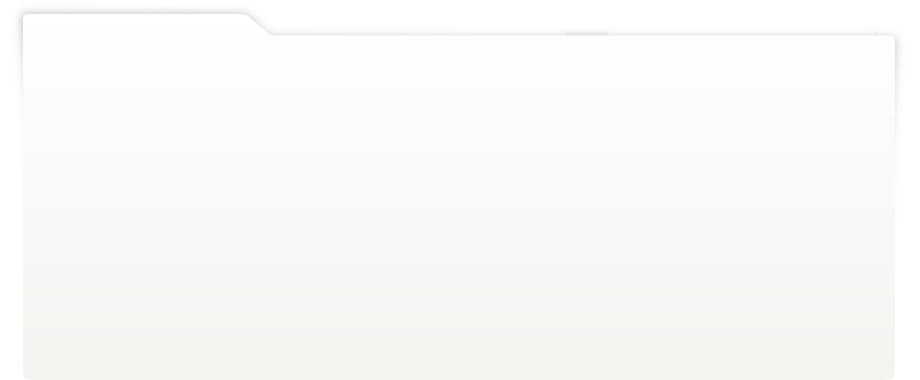
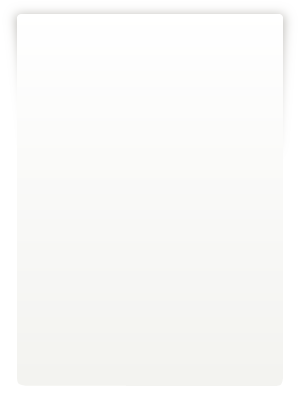
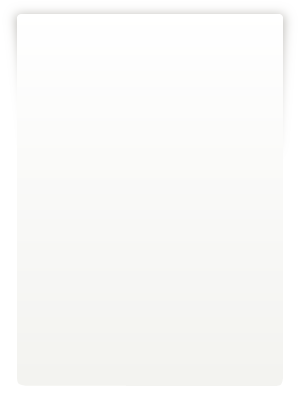
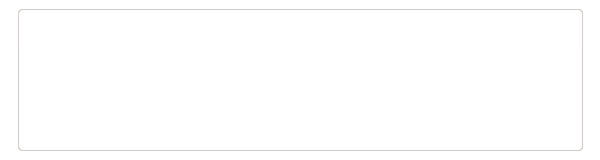
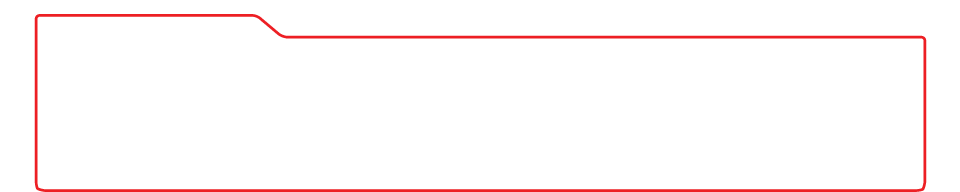
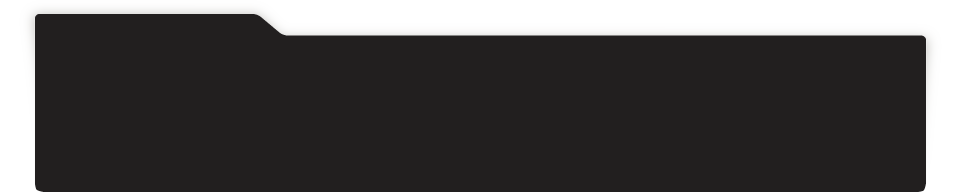
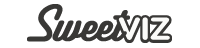
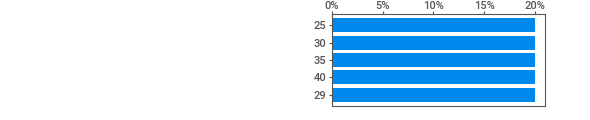
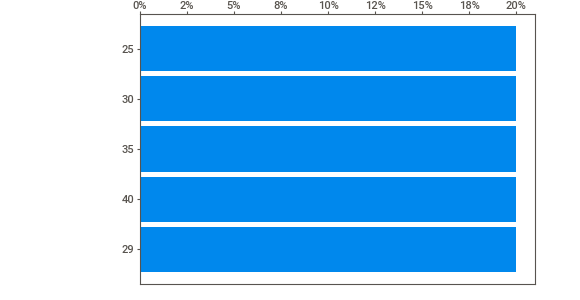
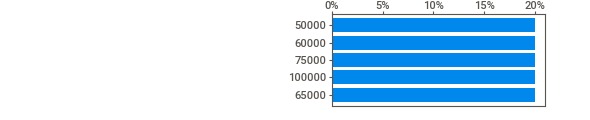
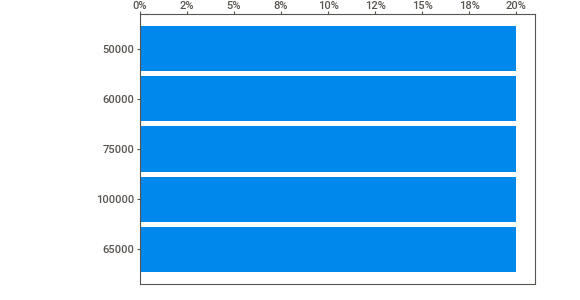
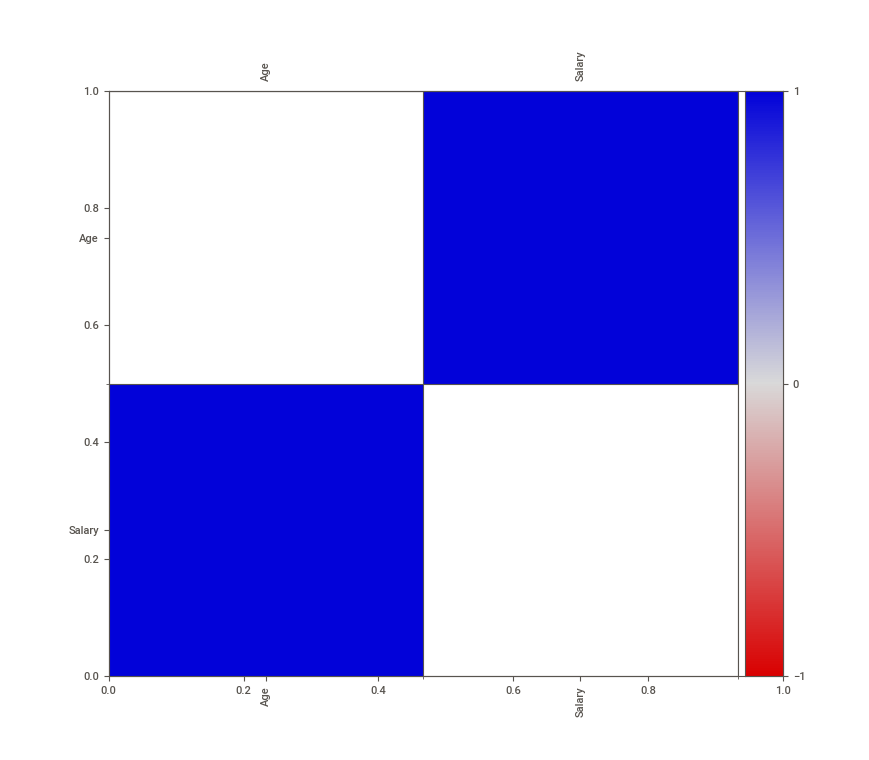
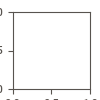

In [6]:
# To display in web
# report.show_html("sweetviz_report.html")   


# Show report inside Jupyter
report.show_notebook()


---

## 🔹 The Situation

* **Old NumPy (1.x)** had a built-in warning class:

  ```python
  np.VisibleDeprecationWarning
  ```

  Used to warn when you made **ragged arrays** (arrays with unequal lengths).

* **New NumPy (2.x)** removed it.

* Old libraries (like **Sweetviz**, **Pandas Profiling**) still try to use it → they crash with:

  ```
  AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'
  ```

---


In [1]:

import numpy as np

# Patch NumPy for Sweetviz compatibility
if not hasattr(np, "VisibleDeprecationWarning"):   # check if missing
    class VisibleDeprecationWarning(Warning):      # define a dummy warning class
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning  # add it back to NumPy



---
## 🔹 Why It’s Used

* The code **“patches” NumPy** by re-creating the missing class.
* When Sweetviz (or any other old package) looks for `np.VisibleDeprecationWarning`, it now finds this **fake version** instead of failing.
* This avoids crashes and makes the library work on NumPy 2.x.

---

## 🔹 Key Points

✅ Keeps old libraries working with new NumPy
✅ Quick, temporary compatibility fix
⚠️ Not a real replacement — it only silences the crash, but doesn’t reproduce NumPy’s original behavior

---

👉 So in one line:
This code is a **compatibility patch** that re-creates `np.VisibleDeprecationWarning` so older libraries (like Sweetviz) can still run on modern NumPy versions.

---


In [2]:
import sweetviz as sv
import pandas as pd

In [3]:
data = pd.read_csv("C:\\Users\\Hello\\OneDrive\\Desktop\\Ethqan\\ML\\Machine Learning-Supervised Algorithm\\Machine Learning-Supervised Algorithm\\Social_Network_Ads.csv")

data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)


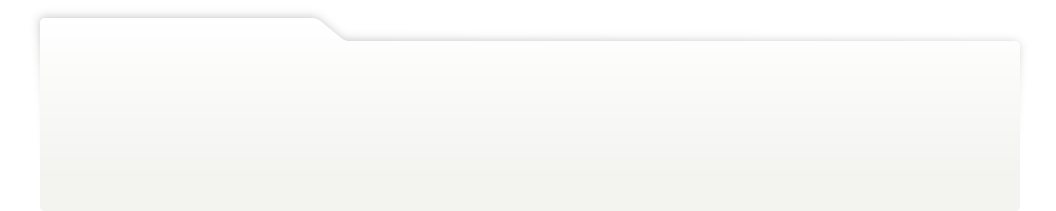
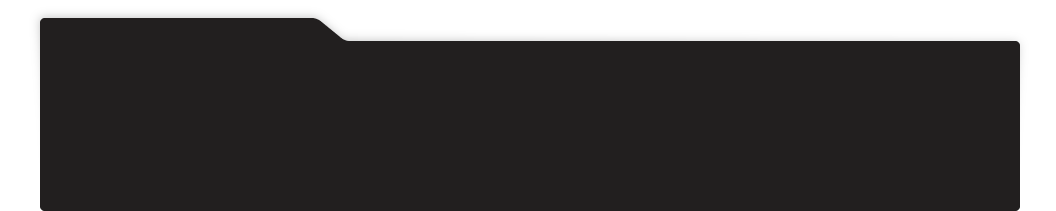
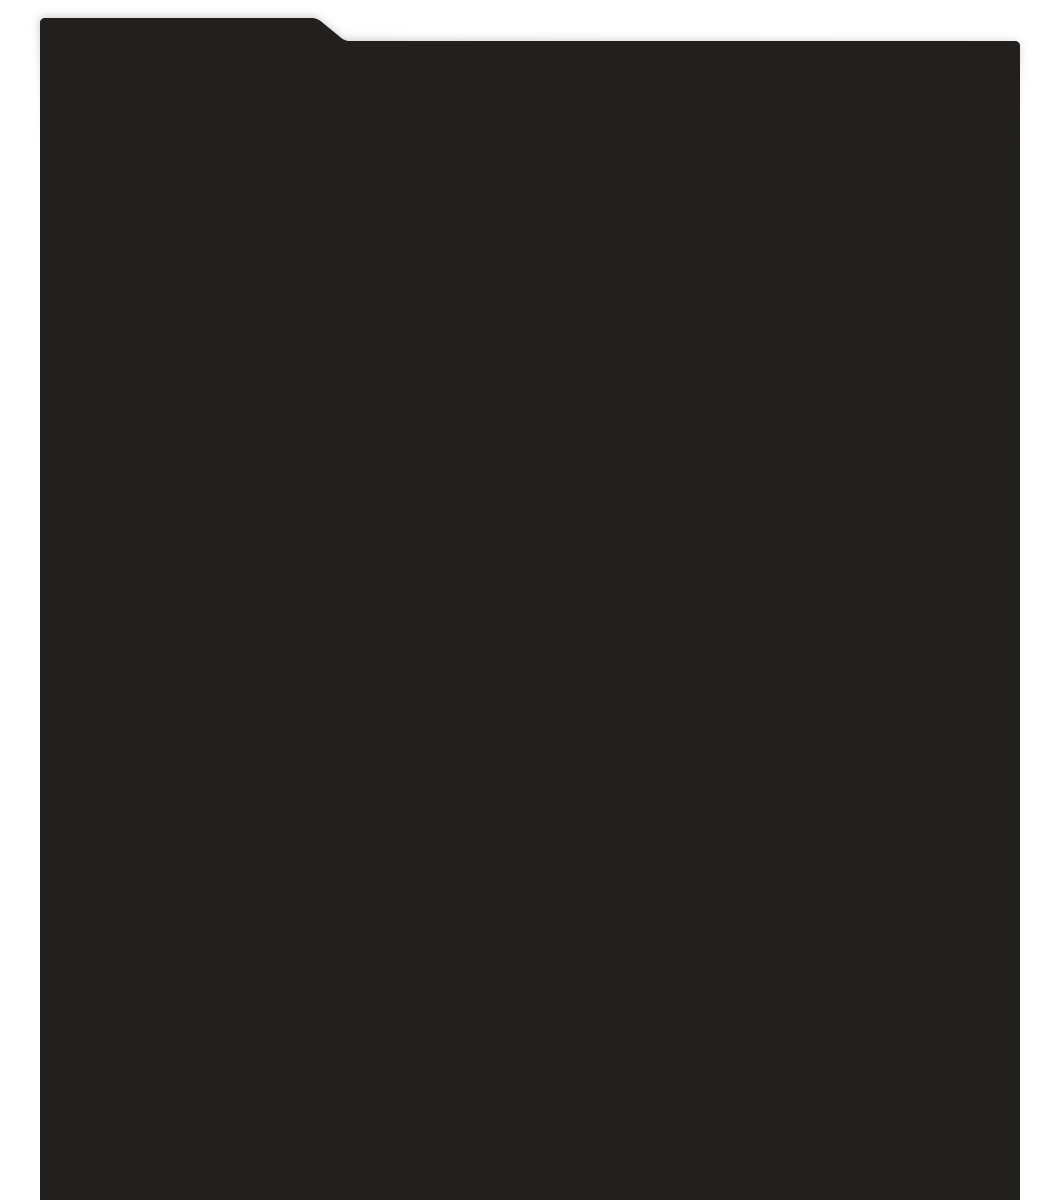
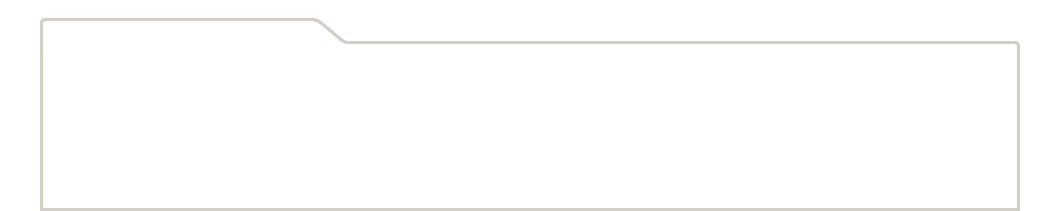
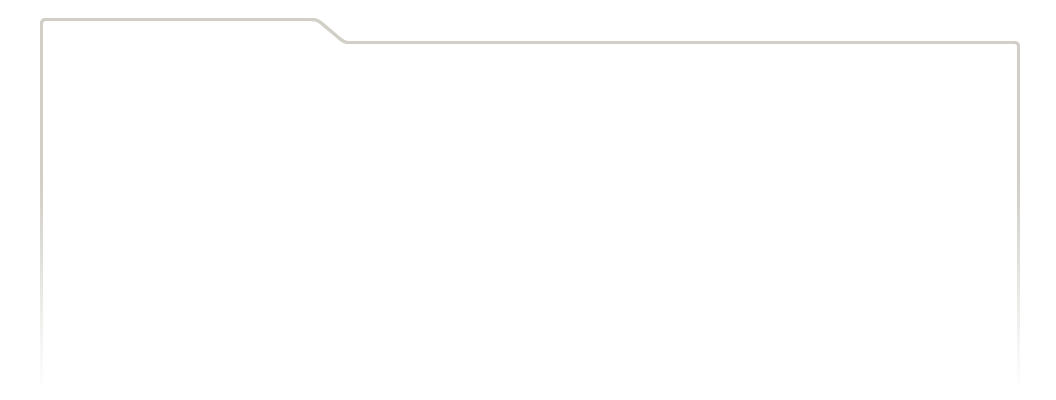
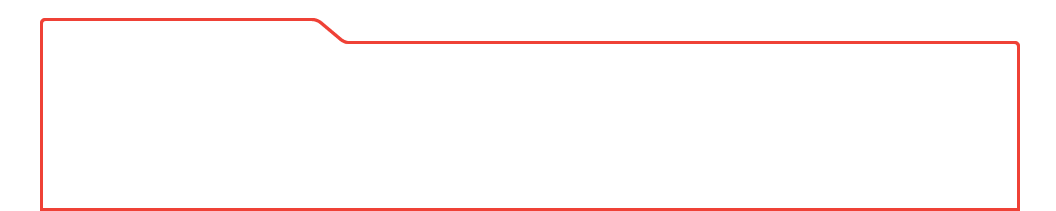
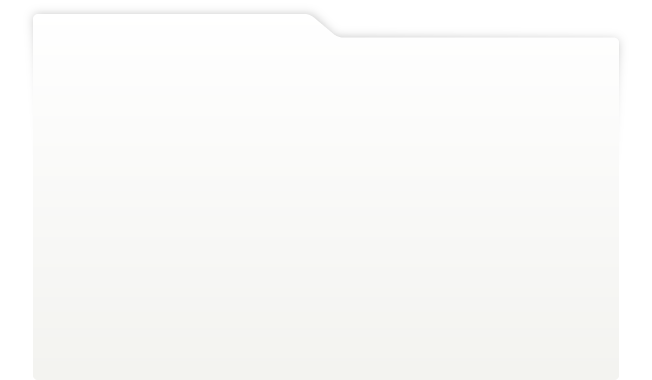
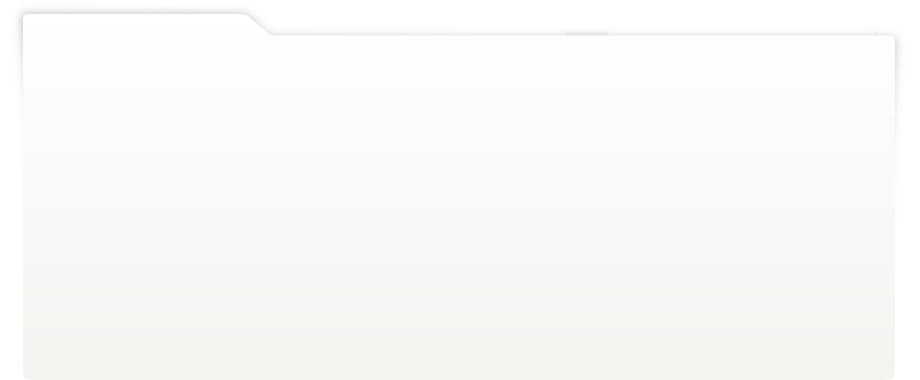
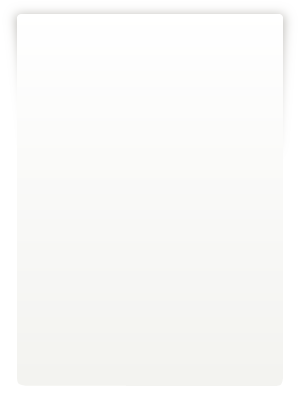
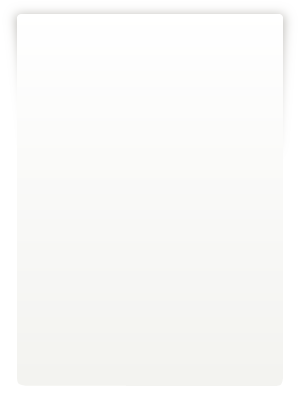
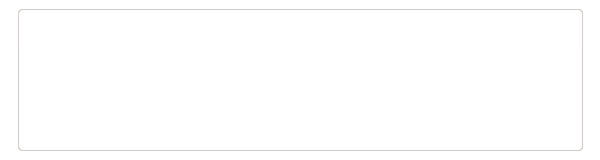
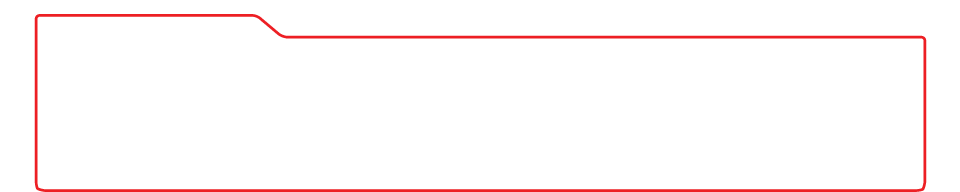
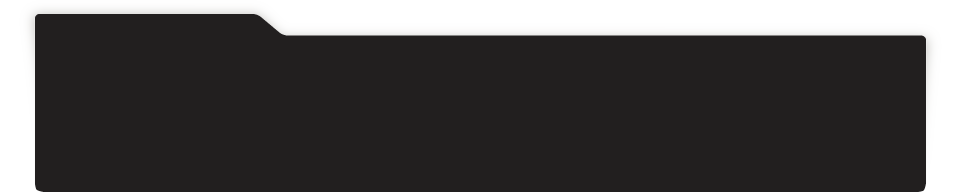
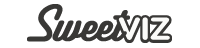
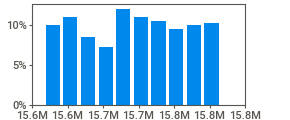
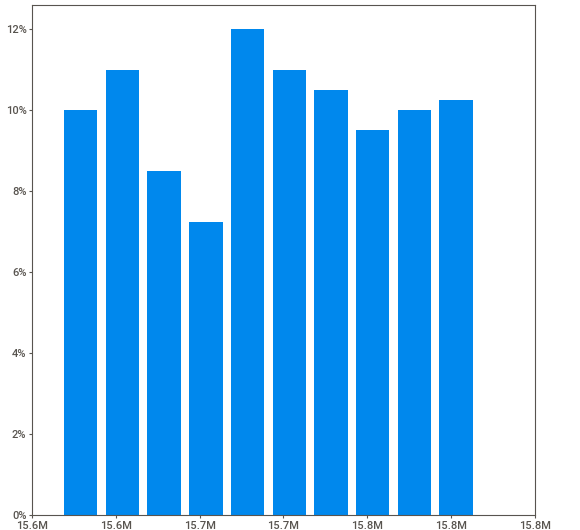
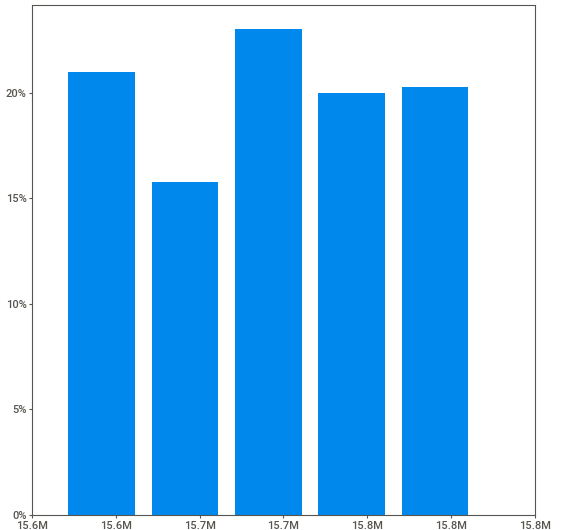
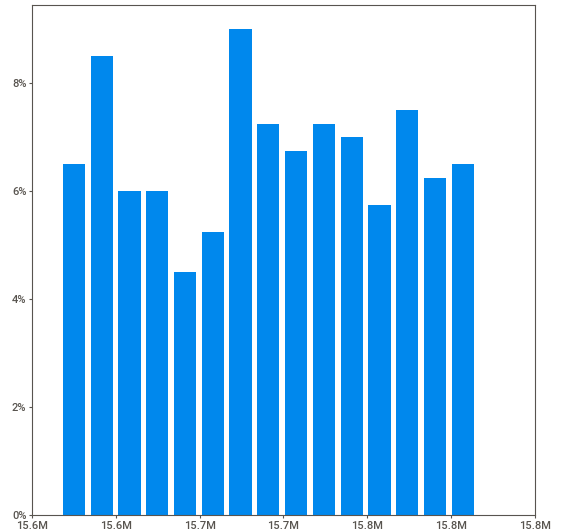
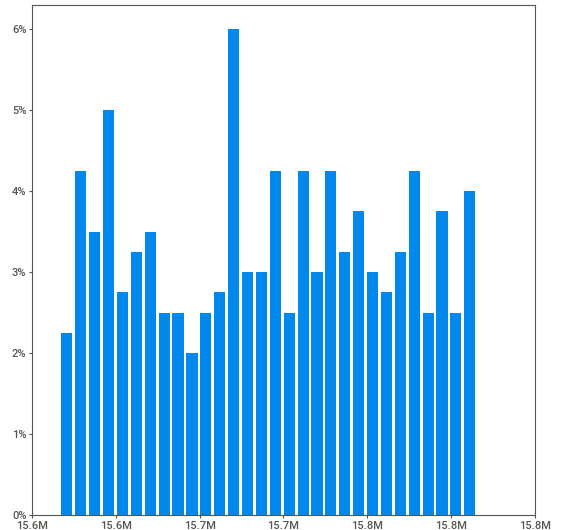
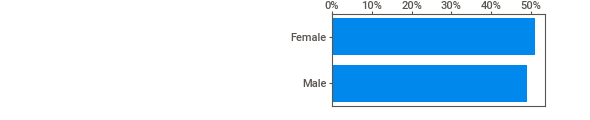
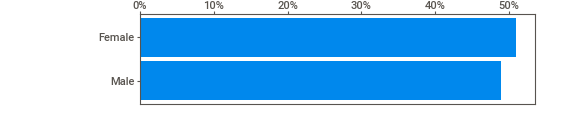
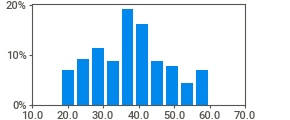
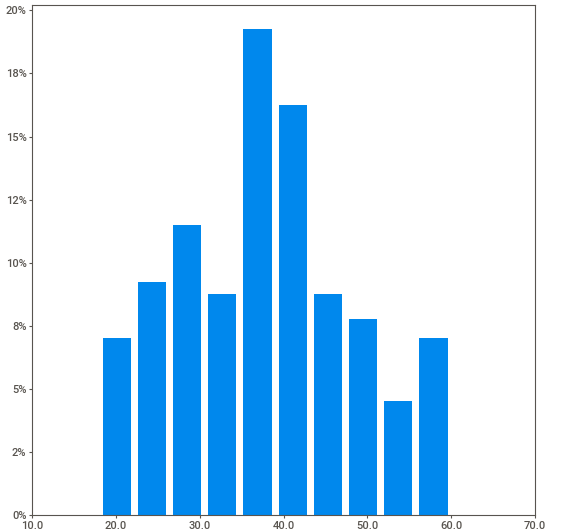
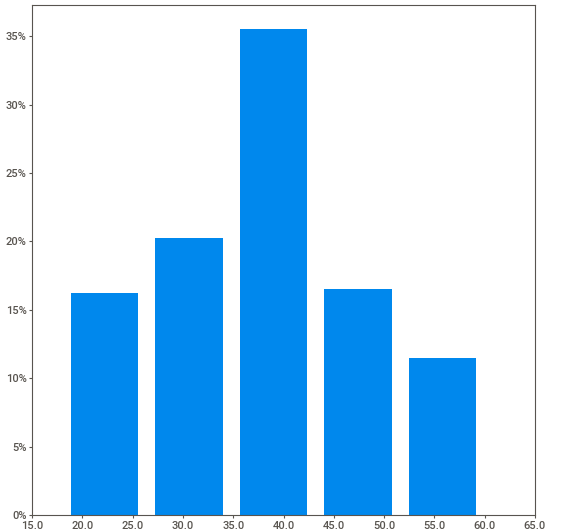
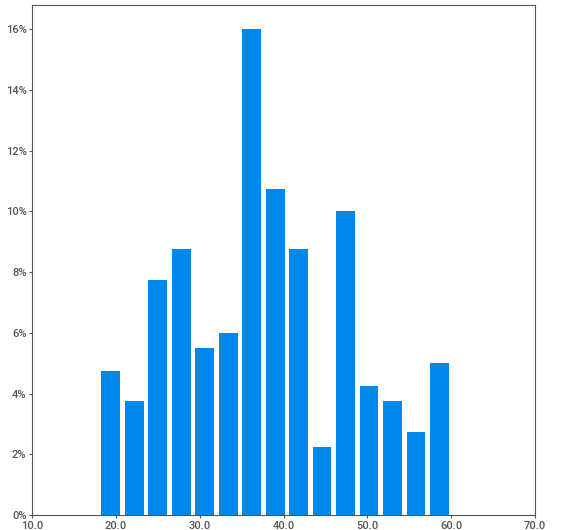
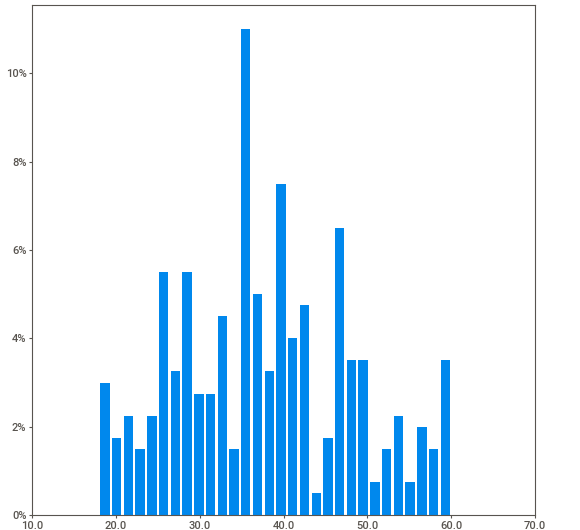
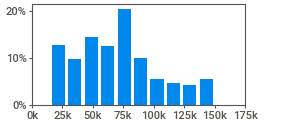
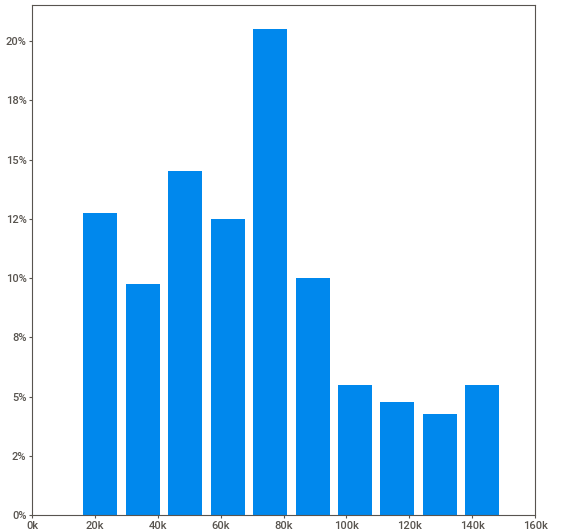
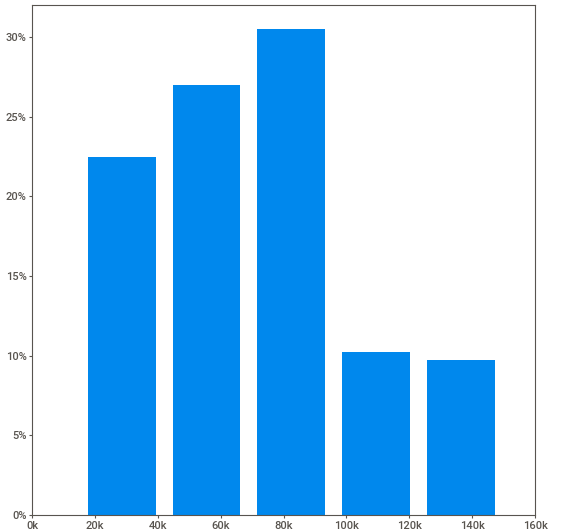
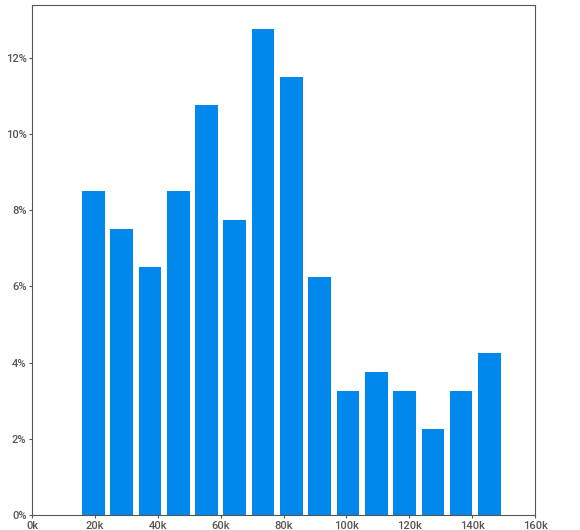
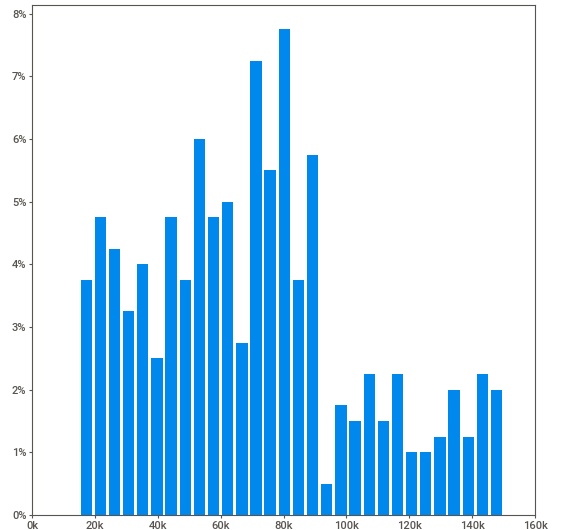
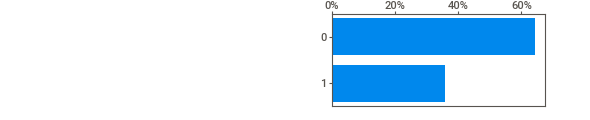
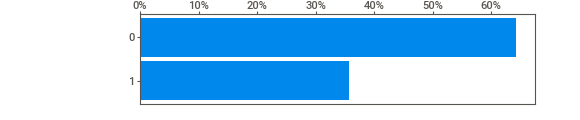
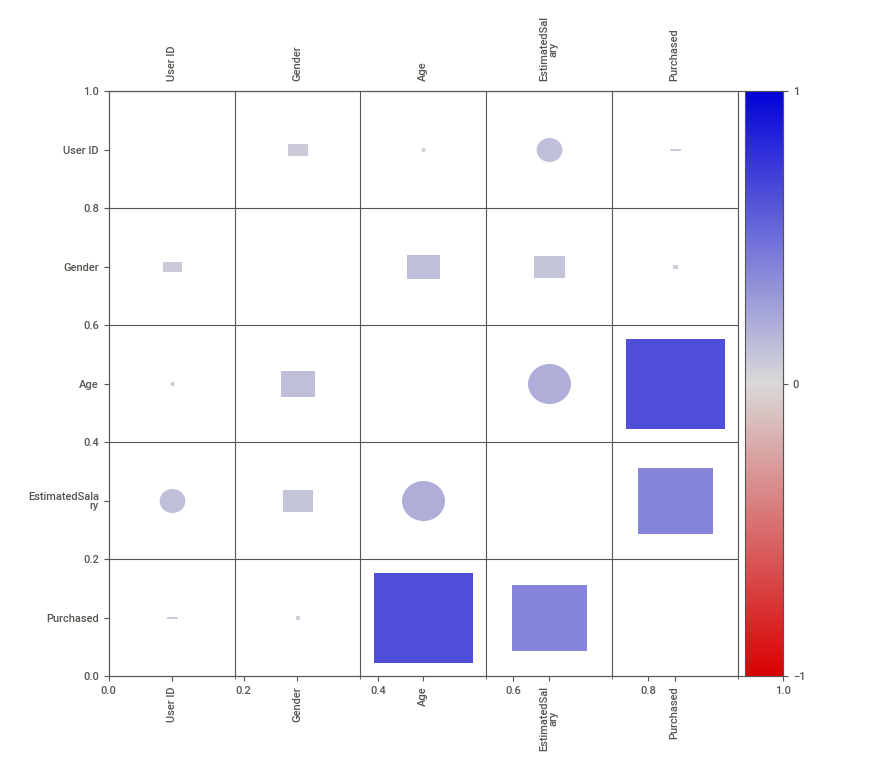
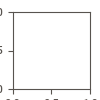

In [5]:
# Show inside Jupyter
report.show_notebook()

In [6]:
# Or save as HTML
# report.show_html("social_ads_report.html")